***VeriSeti***
- https://finance.yahoo.com/quote/BTC-USD/history?period1=1410912000&period2=1703894400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true


- #### ***Furkan Demircan 	 214210050***
- #### ***Eren Elagöz        214210056***

#### **Modeli egitmek icin gerekli kutuphanelerin projeye import edilmesi**

In [13]:
# Kütüphaneler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#### **Modeli egitmek icin kullanilacak olan verisetini projeye eklenmesi**
**Veri setinin ilk 5 verisinin ekrana yazdirilmasi**

In [14]:
df = pd.read_csv('BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


#### **Bitcoin 2013'ten gunumuze kadar günlük Kapanış fiyatlarinin gosterilmesi** 

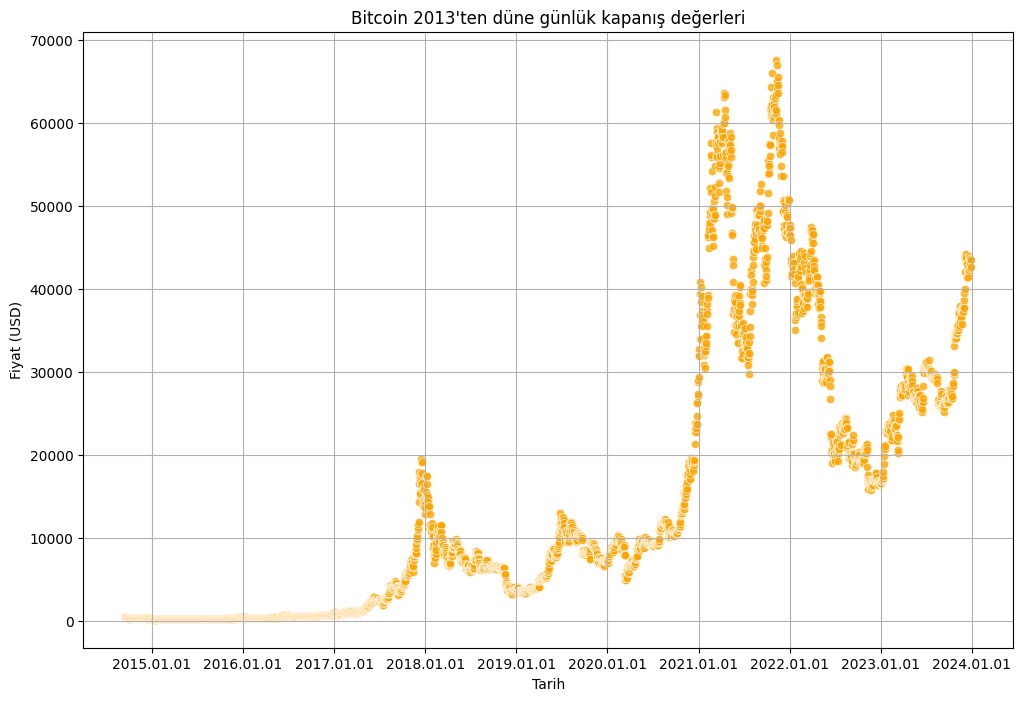

In [15]:

df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Date', y='Close', alpha=0.8, color='orange')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.title("Bitcoin 2013'ten düne günlük kapanış değerleri")
plt.grid(True)
plt.show()

#### **Bitcoinin gunluk kapanis degerlerinin histogram grafiginin cizilmesi** 

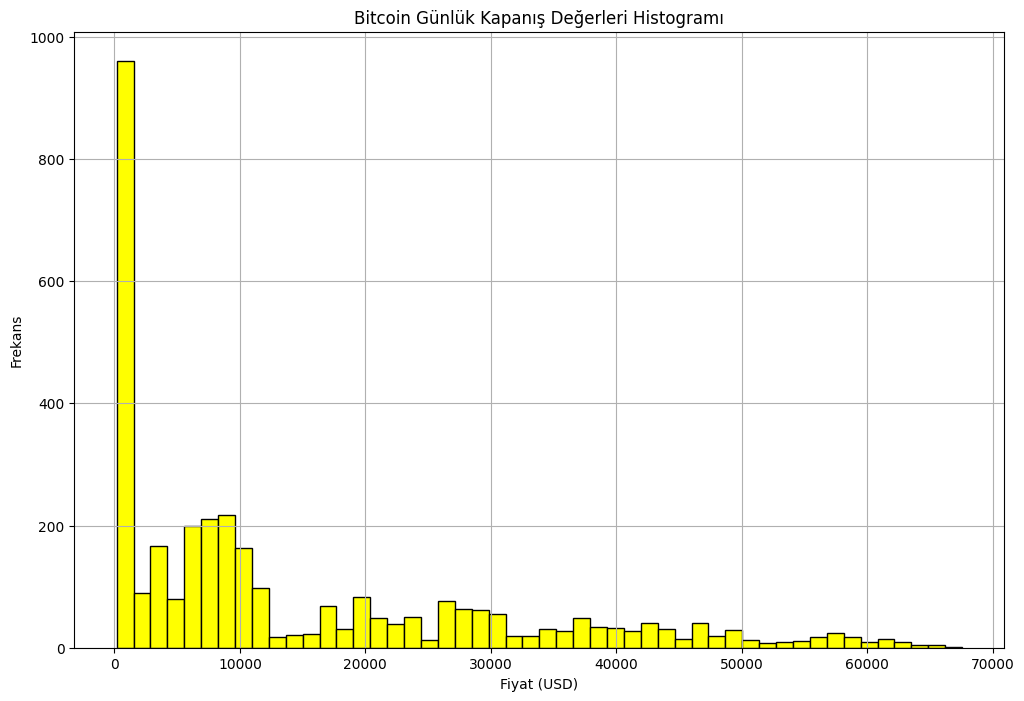

In [16]:

plt.figure(figsize=(12, 8))
plt.hist(df['Close'], bins=50, edgecolor='k', color='yellow')
plt.title('Bitcoin Günlük Kapanış Değerleri Histogramı')
plt.xlabel('Fiyat (USD)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

#### **Modeli egitirken kullanilacak olan bagimsiz degiskenin tanimlanmasi** 
- **Projetion_bitcoin degiskeni bitcoinin tahmin edilecek olan gun sayisini belirlemektedir**
- **Verisetine yeni bir (prediction) sutun eklenir ve kapanis degerleri projection_bitcoin sayisi kadar yukari kaydirilarak bu sutuna eklenir**
- **Bagimsiz degisken olan close sutunu X_Bitcoin degiskenine atanir**


In [17]:

bitcoin_df = pd.read_csv('BTC-USD.csv')
projection_bitcoin = 14
bitcoin_df['Prediction'] = bitcoin_df[['Close']].shift(-projection_bitcoin)
X_Bitcoin = np.array(bitcoin_df[['Close']])
X_Bitcoin = X_Bitcoin[:-projection_bitcoin]
print(X_Bitcoin)

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [41450.222656]
 [42890.742188]
 [43023.972656]]


#### **Modeli egitirken kullanilacak olan bagimli degiskenin tanimlanmasi** 
- **Bagimsiz degisken sutunu y_Bitcoin degiskenine tanimlanir**


In [18]:

y_Bitcoin = bitcoin_df['Prediction'].values
y_Bitcoin = y_Bitcoin[:-projection_bitcoin]
print(y_Bitcoin)
x_train_Bitcoin, x_test_Bitcoin, y_train_Bitcoin, y_test_Bitcoin = train_test_split(X_Bitcoin,y_Bitcoin,test_size=0.20)

[  383.61499    375.071991   359.511993 ... 42520.402344 43442.855469
 42614.550781]


#### **Lineer regresyon kullanilarak modelin egitilmesi** 
- **lineer regresyon linReg_Bitcoin degiskenine tanimlarin**
- **lineer regresyon kullanilarak moedel egitilir**
- **.score() fonksiyonu kullanilarak modelin regersyon guvenilirligi hesaplanmistir**

In [19]:

linReg_Bitcoin = LinearRegression()
linReg_Bitcoin.fit(x_train_Bitcoin,y_train_Bitcoin)
linReg_confidence_Bitcoin = linReg_Bitcoin.score(x_test_Bitcoin,y_test_Bitcoin)
print("Bitcoin için Lineer Regresyon Güvenirliği: %",round((linReg_confidence_Bitcoin*100),3))

Bitcoin için Lineer Regresyon Güvenirliği: % 96.749


#### **Parametrelerin bulunmasi** 
- **.coefficient() fonksiyonu ile denklemin katsayisi(w) bulunmustur**
- **.intercept_() fonksiyonu ile denklemin sabit sayisi(b) bulunmustur**


In [20]:
w = linReg_Bitcoin.coef_[0].round(4)
b = linReg_Bitcoin.intercept_.round(2)
print("w = {} \n b={}".format(w,b))

w = 0.9832 
 b=400.96


#### **Tahmin yapabilmek icin sondan projection_bitcoin degiskeni kadar kapanis degerinin degiskene atilmasi** 

In [21]:

x_projection_Bitcoin = np.array(bitcoin_df[['Close']])[-projection_bitcoin:]
print(x_projection_Bitcoin)

[[41929.757813]
 [42240.117188]
 [41364.664063]
 [42623.539063]
 [42270.527344]
 [43652.25    ]
 [43869.152344]
 [43997.902344]
 [43739.542969]
 [43016.117188]
 [43613.140625]
 [42520.402344]
 [43442.855469]
 [42614.550781]]


#### **.predict() fonksiyonu kullanilarak istenilen deger kadar tahmin olusturulmasi** 

In [22]:

linReg_prediction_Bitcoin = linReg_Bitcoin.predict(x_projection_Bitcoin)
print(linReg_prediction_Bitcoin)

[41627.37347994 41932.52675326 41071.75885561 42309.51694478
 41962.42679623 43320.97184197 43534.23577274 43660.82606485
 43406.80052115 42695.50979543 43282.51850445 42208.11028548
 43115.08978492 42300.67943609]


#### **Tahmin edilen degerlerin grafikte gosterilmesi** 

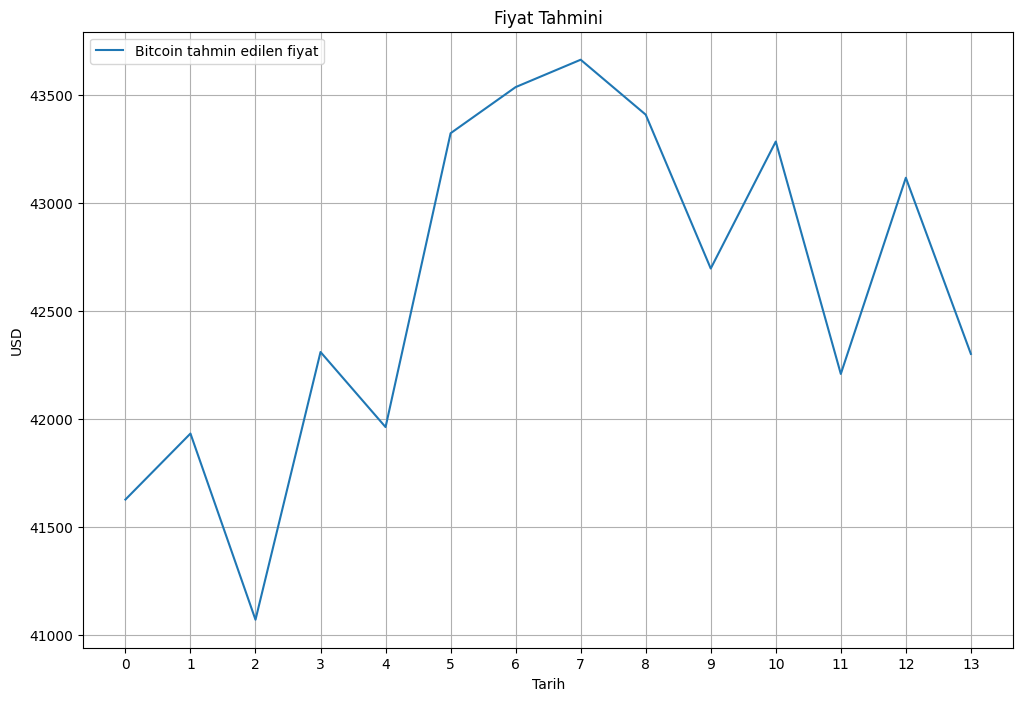

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(linReg_prediction_Bitcoin, label='Bitcoin tahmin edilen fiyat')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.title('Fiyat Tahmini')
plt.xlabel('Tarih')
plt.ylabel('USD')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### **Simdide modelimizin olusturdugu grafik ile gercek degerleri karsilastiralim**

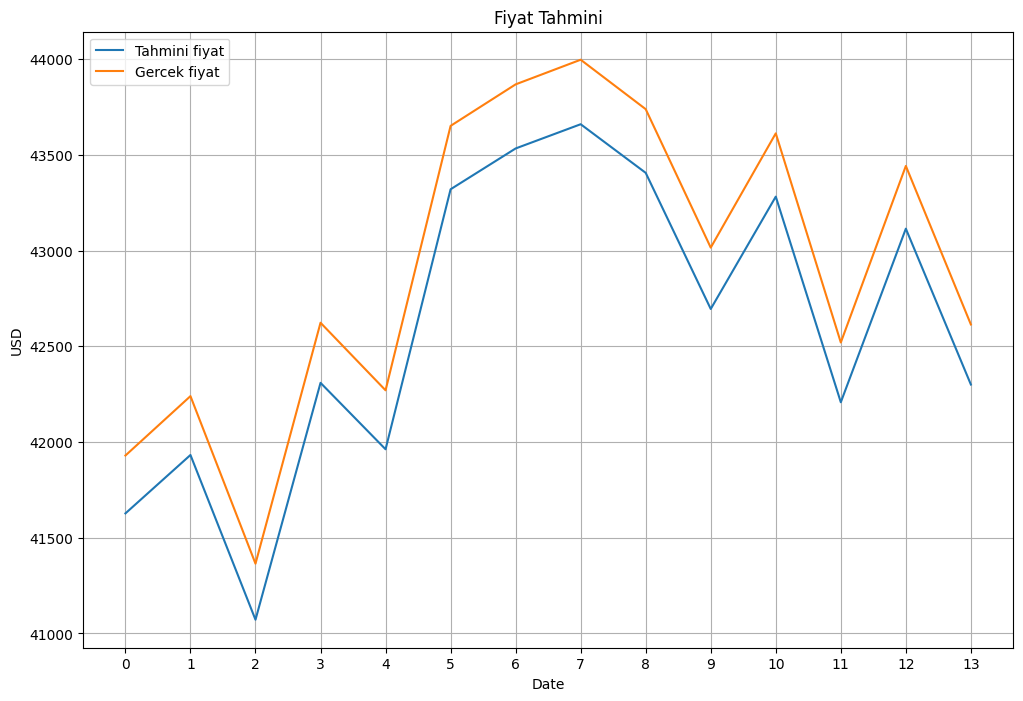

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(linReg_prediction_Bitcoin, label='Tahmini fiyat')
plt.plot(x_projection_Bitcoin, label='Gercek fiyat')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.title('Fiyat Tahmini')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()